# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# !pip install matplotlib

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import os
import os

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #1500
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) #1500
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
city_data = []
for city in cities:
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"
        city_weather = requests.get(query_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...:")
        # pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
City not found. Skipping...:
-----------------------------
Data Retrieval Complete      
-----------------------------


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bethel,41.3712,-73.4140,12.74,53,100,0.89,US,1731275228
1,sumberpucung,-8.1586,112.4829,21.83,96,100,0.65,ID,1731275229
2,grytviken,-54.2811,-36.5092,-0.47,84,64,2.74,GS,1731275230
3,imbituba,-28.2400,-48.6703,19.89,72,0,7.00,BR,1731275231
4,tutoia,-2.7619,-42.2744,26.58,81,87,6.57,BR,1731275232


In [11]:
# output_dir did not exist.
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,12.74,53,100,0.89,US,1731275228
1,sumberpucung,-8.1586,112.4829,21.83,96,100,0.65,ID,1731275229
2,grytviken,-54.2811,-36.5092,-0.47,84,64,2.74,GS,1731275230
3,imbituba,-28.2400,-48.6703,19.89,72,0,7.00,BR,1731275231
4,tutoia,-2.7619,-42.2744,26.58,81,87,6.57,BR,1731275232


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

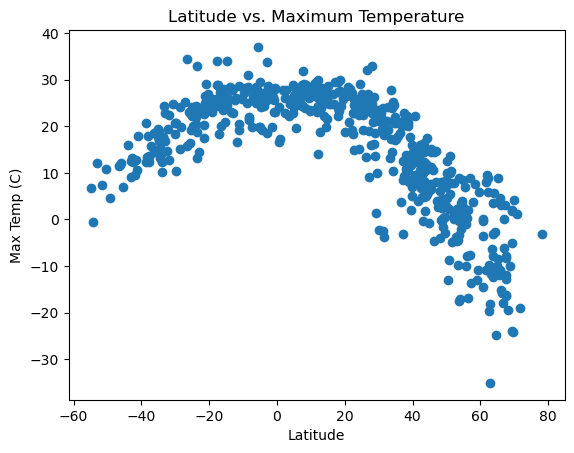

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
plt.title("Latitude vs. Maximum Temperature")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

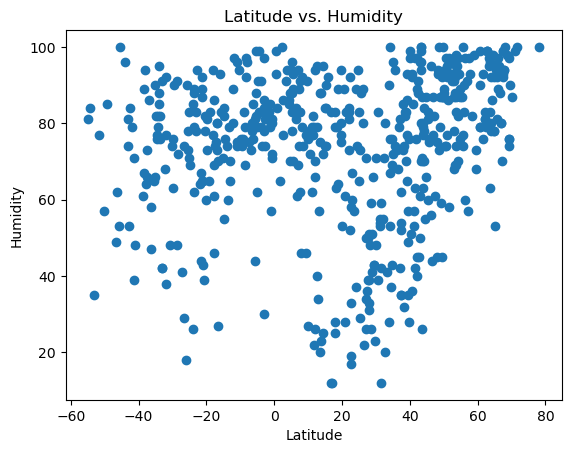

In [17]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

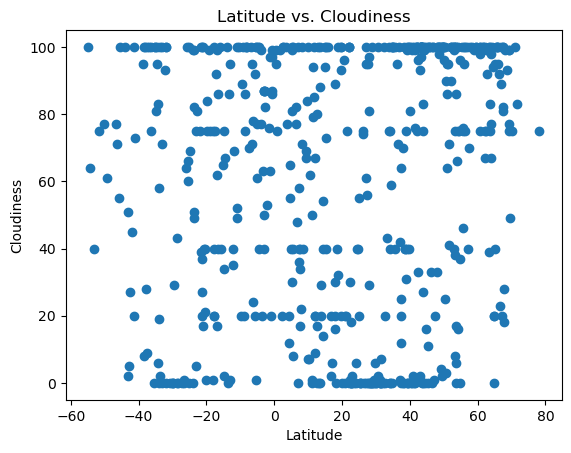

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

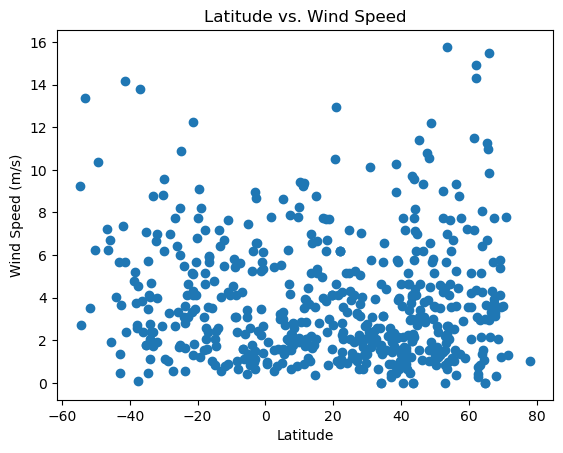

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("Latitude vs. Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, ylabel):
    # Reshape the data
    x = x.values.reshape(-1, 1)
    y = y.values.reshape(-1, 1)

    # Calculate linear regression parameters using linregress
    slope, intercept, r_value, p_value, stderr = linregress(x.flatten(), y.flatten())
    r_squared = r_value ** 2

    # Calculate the predicted y values based on the regression line
    y_pred = x.flatten() * slope + intercept
    
    plt.scatter(x, y, color='blue', label='Data Points')
    plt.plot(x, y_pred, color='red', label='Regression Line')

    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

    plt.annotate(line_eq, (x.min(), y.max()), fontsize=12, color="red")
    
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.legend()

    plt.text(0.00, 1.08, f"The r²-value is {r_squared}", fontsize=12, color="black", transform=plt.gca().transAxes)
    
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bethel,41.3712,-73.4140,12.74,53,100,0.89,US,1731275228
5,bilibino,68.0546,166.4372,-19.43,100,99,0.32,RU,1731275234
7,tommot,58.9564,126.2925,-13.07,98,99,1.16,RU,1731275236
8,hamilton,39.1834,-84.5333,17.69,93,100,5.66,US,1731274995
9,praia da vitoria,38.7333,-27.0667,20.14,83,75,5.76,PT,1731275238


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sumberpucung,-8.1586,112.4829,21.83,96,100,0.65,ID,1731275229
2,grytviken,-54.2811,-36.5092,-0.47,84,64,2.74,GS,1731275230
3,imbituba,-28.2400,-48.6703,19.89,72,0,7.00,BR,1731275231
4,tutoia,-2.7619,-42.2744,26.58,81,87,6.57,BR,1731275232
6,alice springs,-23.7000,133.8833,18.75,88,99,3.60,AU,1731275235


###  Temperature vs. Latitude Linear Regression Plot

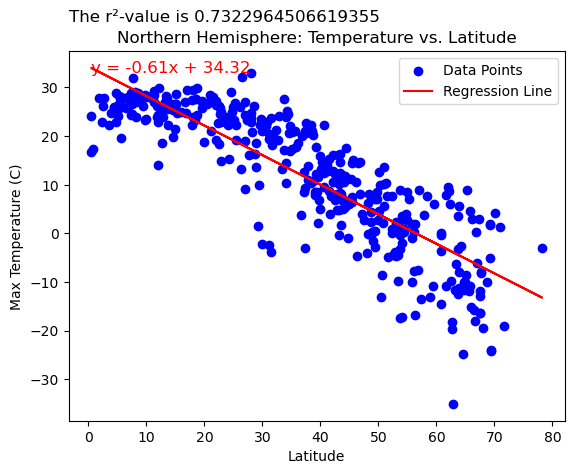

In [27]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Northern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

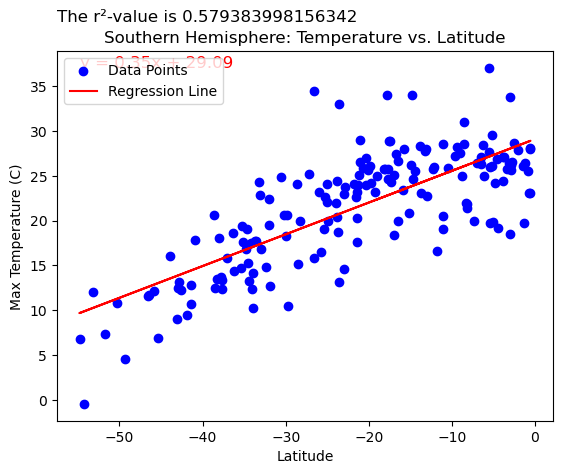

In [28]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Southern Hemisphere: Temperature vs. Latitude", "Max Temperature (C)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

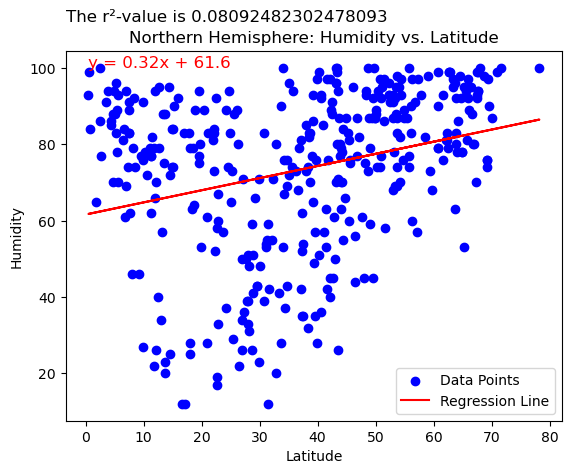

In [31]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Northern Hemisphere: Humidity vs. Latitude", "Humidity")

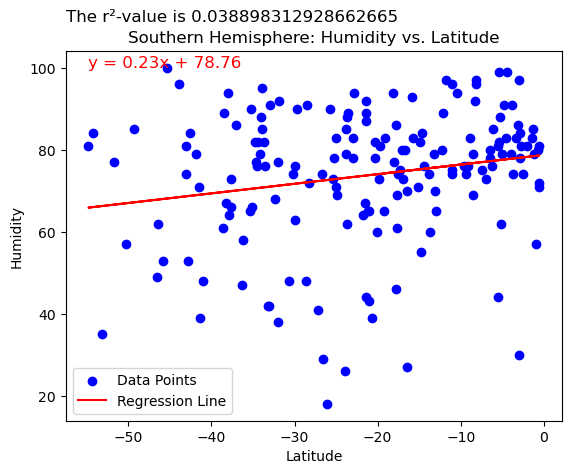

In [32]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Southern Hemisphere: Humidity vs. Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

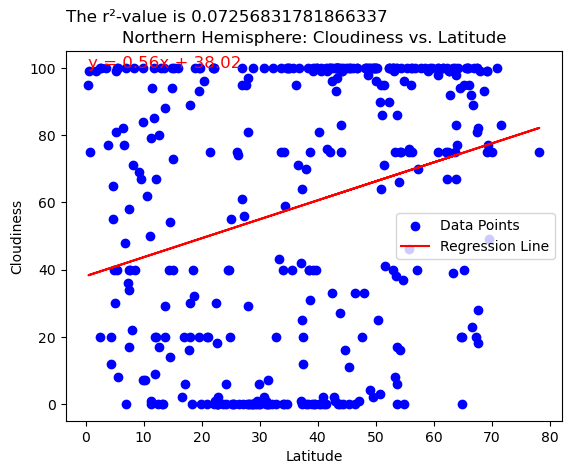

In [35]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Northern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

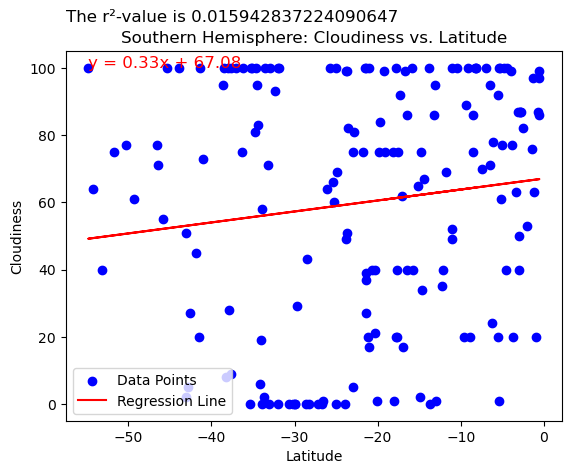

In [36]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Southern Hemisphere: Cloudiness vs. Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

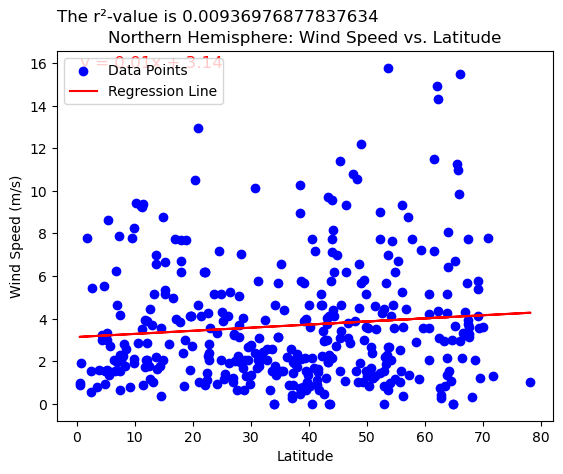

In [39]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Northern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

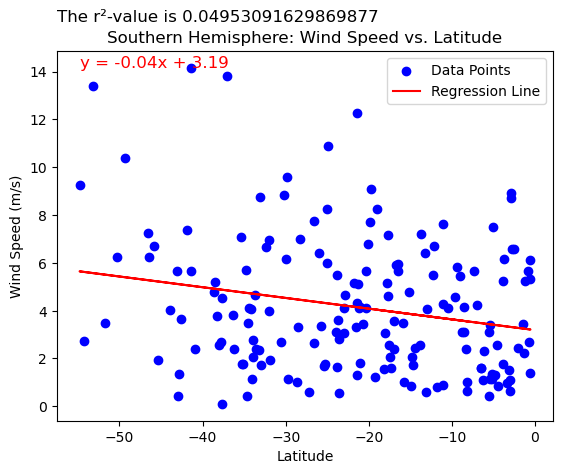

In [40]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Southern Hemisphere: Wind Speed vs. Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** YOUR RESPONSE HERE